<a href="https://colab.research.google.com/github/Subramanian1410/Subbu/blob/master/Copy_of_App_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion Process

In [ ]:
# Importing Pandas Library using an alias "pd"
import pandas as pd

In [ ]:
# Importing files to Google Colab
from google.colab import files

In [ ]:
# Uploading the file from local disk
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
# Running a 'for' loop to check if the file is uploaded properly
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "googleplaystore.csv" with length 1360155 bytes


In [ ]:
# Rechecking the upload
uploaded

{'googleplaystore.csv': b'App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\r\nPhoto Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up\r\nColoring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up\r\n"U Launcher Lite \xe2\x80\x93 FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up\r\nSketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up\r\nPixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up\r\nPaper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March

In [ ]:
# Importing IO Module
import io

In [ ]:
# Reading the data frame and assigning it to a variable 'gps' (short for 'Google Play Store')
gps = pd.read_csv(io.StringIO(uploaded['googleplaystore.csv'].decode('utf-8')))

# Data Wrangling Process

In [ ]:
# Reading the head of the data frame
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Getting the information about the data frame
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Checking the shape of the data frame
gps.shape

(10841, 13)

# Data Exploration and Data Preparation Process

In [ ]:
# Finding the data types of each column
gps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Finding Null Values of each column
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Finding if there are any values in the column 'Rating' which are more than 5
gps[gps['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# It looks like the data in row index number 10472 is shifted one cell towards left.
# Rating cannot be more than 5. Hence, it is better to drop this row altogether to avoid any further hassles

# Dropping row index number 10472

gps.drop(10472, inplace=True)

In [ ]:
# Finding if there are any values in the column 'Rating' which are less than 1
gps[gps['Rating'] < 1]

# There are no rating which is less than 1.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Importing Regular Expression Library
import re

In [ ]:
# Removing special characters from the values of column 'Installs'
gps['Installs'] = gps['Installs'].map(lambda x: re.sub(r'\W+','', x))

In [ ]:
# Converting column 'Installs' from a string column to a float column
gps['Installs'] = gps['Installs'].astype(str).astype(float)

In [ ]:
# Converting column 'Reviews' from a string column to a float column
gps['Reviews'] = gps['Reviews'].astype(str).astype(float)

In [ ]:
# Importing NumPy Library using as alias "np"
import numpy as np

In [ ]:
# Creating a new categorical column 'Installs_Compare' to compare the values from the column 'Reviews' and 'Installs'.
# The categories would be "Correct" if the value in 'Reviews' is less than or equal to the values in 'Installs' otherwise, it would be "Incorrect"

gps['Installs_Compare'] = np.where(gps['Reviews'] <= gps['Installs'], 'Correct', 'Incorrect')

In [ ]:
# Finding if there are any "Incorrect" values present in the column "Installs_Compare"
gps[gps['Installs_Compare'] == 'Incorrect']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Compare
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25M,1.0,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,Incorrect
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64M,1.0,Free,0,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up,Incorrect
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,Varies with device,10000.0,Paid,$2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,Incorrect
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238k,1.0,Paid,$0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up,Incorrect
5917,Ra Ga Ba,GAME,5.0,2.0,20M,1.0,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,Incorrect
6508,Sam.BN Pro,TOOLS,NaN,11.0,2.0M,10.0,Paid,$0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up,Incorrect
6700,Brick Breaker BR,GAME,5.0,7.0,19M,5.0,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,Incorrect
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1M,10.0,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,Incorrect
8591,DN Blog,SOCIAL,5.0,20.0,4.2M,10.0,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up,Incorrect
9096,DZ Puzzle,FAMILY,NaN,14.0,47M,10.0,Paid,$0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up,Incorrect


In [ ]:
# Finding in how many rows, the value of 'Reviews' is more than the value of 'Installs'
gps[gps['Installs_Compare'] == 'Incorrect'].shape

(11, 14)

In [ ]:
# Replacing all the values of "Reviews" where they are more than the values of "Installs" with the values of "Installs".
# Because reviews cannot be more than installs.

gps['Reviews'] = np.where(gps['Installs_Compare'] == "Incorrect", gps['Installs'], gps['Reviews'])

In [ ]:
# Dropping the column "Installs_Compare" as the task is completed
gps.drop(['Installs_Compare'],axis=1,inplace=True)

In [ ]:
# Adding a new categorical column 'Reviews_Group' to the data frame which will have the below categories:
# a) 1 for the reviews less than or equal to 100,000
# b) 2 for the reviews between 100,001 and 1,000,000
# c) 3 for the reviews between 1,000,001 and 5,000,000
# d) 4 for the reviews more than 5,000,000

# Creating a user-defined function to divide the column 'Reviews' into the aforementioned categories

def reviews_cate(gps):
  result = []
  for x in gps['Reviews']:
    if x <= 100000:
      tmp = int(1)
      result.append(tmp)
    elif 100000 < x <= 1000000:
      tmp = int(2)
      result.append(tmp)
    elif 1000000 < x <= 5000000:
      tmp = int(3)
      result.append(tmp)
    else:
      tmp = int(4)
      result.append(tmp)
  return result

In [ ]:
# Calling the user-defined function
result = reviews_cate(gps)

In [ ]:
# Adding a new column 'Reviews_Group' to the data frame
gps['Reviews_Group'] = result

In [ ]:
# Checking the number of unique values present in the column 'Reviews_Group'
gps.Reviews_Group.unique()

array([1, 2, 3, 4])

In [ ]:
# Checking the median of each category created in column 'Reviews_Group' based on the values in the column 'Rating'
gps.groupby('Reviews_Group').Rating.median()

Reviews_Group
1    4.2
2    4.4
3    4.4
4    4.5
Name: Rating, dtype: float64

In [ ]:
# Replacing all the Null Values of column 'Rating' with the median of each group from the column 'Reviews_Group'
gps['Rating'] = gps.groupby('Reviews_Group')['Rating'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Rechecking the Null Values of each column
gps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Reviews_Group     0
dtype: int64

In [ ]:
# Creating a user-defined function to remove the characters 'M' and 'k' from the values while
# the values ending with 'M' are being multiplied by 1000; leaving 'Varies with device' as is
# for it to be treated later

def size_cleanser(gps):
  result = []
  for x in gps['Size']:
    if 'M' in x:
      tmp = x.replace('M','')
      tmp = float(tmp) * 1000
      result.append(tmp)
    elif 'k' in x:
      tmp = x.replace('k','')
      result.append(tmp)
    else:
      result.append(x)
  return result

In [ ]:
# Calling the user-defined function
result = size_cleanser(gps)

In [ ]:
# Creating a new column 'Conv_Size' to be added to the data frame with the output
gps['Conv_Size'] = result

In [ ]:
# Replacing all 'Varies with device' from the column 'Conv_Size' with Null Values
gps['Conv_Size'] = gps['Conv_Size'].replace('Varies with device',np.nan)

In [ ]:
# Rechecking the Null Values of each column
gps.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Reviews_Group        0
Conv_Size         1695
dtype: int64

In [ ]:
# Converting column 'Conv_Size' from a string column to a float column
gps['Conv_Size'] = gps['Conv_Size'].astype(str).astype(float)

In [ ]:
# Checking the median of each category created in column 'Reviews_Group'
# based on the values in the column 'Conv_Size'

gps.groupby('Reviews_Group').Conv_Size.median()

Reviews_Group
1    11000.0
2    28000.0
3    49000.0
4    67000.0
Name: Conv_Size, dtype: float64

In [ ]:
# Replacing all the Null Values of column 'Conv_Size' with the median of each group from the column 'Reviews_Group'
gps['Conv_Size'] = gps.groupby('Reviews_Group')['Conv_Size'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Rechecking the Null Values of each column
gps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Reviews_Group     0
Conv_Size         0
dtype: int64

In [ ]:
# Removing '$' from all the values of column 'Price' and converting the column to a float column
gps['Price'] = gps.Price.str.replace('$','').astype(float)

In [ ]:
# Rechecking the data types of all the columns
gps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Reviews_Group       int64
Conv_Size         float64
dtype: object

In [ ]:
# Dropping few columns such as 'App', 'Last Updated', 'Current Ver' and 'Android Ver'.
# The above mentioned columns are not required for further analysis.
# Dropping column 'Size' because it is converted to 'Conv_Size' and is of no use now.
# Dropping column 'Reviews_Group' because it is of no use now.

gps.drop(['App', 'Size', 'Last Updated', 'Current Ver', 'Android Ver', 'Reviews_Group'], axis=1, inplace=True)

In [ ]:
# Finding the row index number of the null value present in column 'Type'
gps[gps['Type'].isnull()].index.tolist()

[9148]

In [ ]:
# Analysing the row index number 9148
gps.iloc[9148]

Category                FAMILY
Rating                     4.2
Reviews                      0
Installs                     0
Type                       NaN
Price                        0
Content Rating    Everyone 10+
Genres                Strategy
Conv_Size                11000
Name: 9148, dtype: object

In [ ]:
# Since, the corresponding value of the column 'Price' is 0, the value in the column 'Type' would be 'Free'.
# Hence, replacing the null value with 'Free'

gps['Type'].fillna('Free', inplace=True)

In [ ]:
# Rechecking the column 'Type' for the row index number 9148
gps.iloc[9148]

Category                FAMILY
Rating                     4.2
Reviews                      0
Installs                     0
Type                      Free
Price                        0
Content Rating    Everyone 10+
Genres                Strategy
Conv_Size                11000
Name: 9148, dtype: object

In [ ]:
# Rechecking all the Null Values
gps.isnull().sum()

Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Conv_Size         0
dtype: int64

In [ ]:
# Rechecking the head of the data frame
gps.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Conv_Size
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0
3,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,25000.0
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0


# Data Visualization Process

In [ ]:
# Importing Mat Plot Library using an alias "plt"
import matplotlib.pyplot as plt

In [ ]:
# Making plots to be displayed inline
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a3011ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a30275f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a2fb10b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a3027cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a3011eb8>,
  <matplotlib.lines.Line2D at 0x7f80a3027278>]}

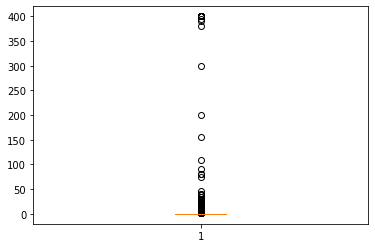

In [ ]:
# Creating a Boxplot for the column 'Price'
plt.boxplot(gps.Price)

# There are quiet a few outliers which are more than $200.

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a2af4198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a2af4ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a2afd668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a2afd2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a2af44a8>,
  <matplotlib.lines.Line2D at 0x7f80a2af4828>]}

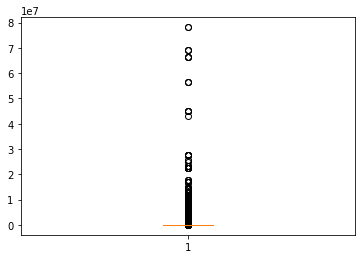

In [ ]:
# Creating a Boxplot for the column 'Reviews'
plt.boxplot(gps.Reviews)

# There are quiet a few outliers more than 2 million.

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a2a615f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a2a6d048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a2a6dac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a2a6d748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a2a61908>,
  <matplotlib.lines.Line2D at 0x7f80a2a61c88>]}

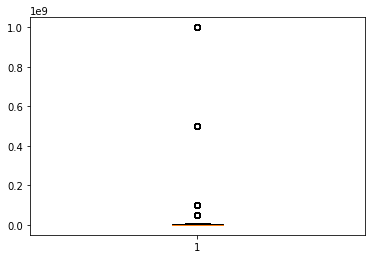

In [ ]:
# Creating a Boxplot for the column 'Installs'
plt.boxplot(gps.Installs)

# There are a few outliers more than 2 million.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80a29f75c0>]],
      dtype=object)

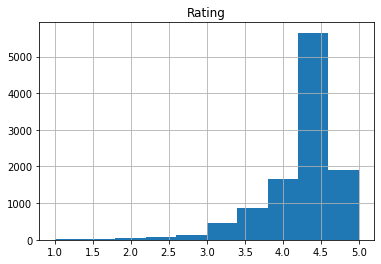

In [ ]:
# Creating a Histogram for the column 'Rating'
gps.hist(column='Rating')

# The ratings are more towards higher. Specially, 4.5 seems like the mode.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80a2972cc0>]],
      dtype=object)

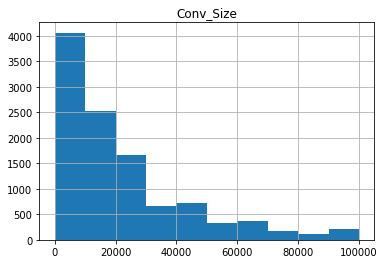

In [ ]:
# Creating a Histogram for the column 'Conv_Size'
gps.hist(column='Conv_Size')

# The size of most of the apps are less than 20MB.
# There are a few outliers wherein few apps are higher than 60MB.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80a29125f8>]],
      dtype=object)

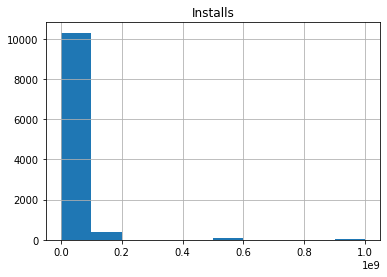

In [ ]:
# Creating a Histogram for the column 'Installs'
gps.hist(column='Installs')

# Most of the apps were installed less than 2 million times with very few outliers
# wherein the apps were installed more than 2 million times.

# Treating Outliers

In [ ]:
# Finding how many apps are costlier than $200 based on the Boxplot above
gps[gps['Price'] > 200].shape

(17, 9)

In [ ]:
# The apps which are costlier than $200 seem to be outliers. Hence, dropping them.
gps = gps.drop(gps[(gps['Price'] > 200)].index)

In [ ]:
# Finding how many apps have more than 2 Million reviews based on the Boxplot above
gps[gps['Reviews'] > 2000000].shape

(453, 9)

In [ ]:
# The apps which have more than 2 Million reviews seem to be outliers. Hence, dropping them.
gps = gps.drop(gps[(gps['Reviews'] > 2000000)].index)

In [ ]:
# Finding quantiles for the column 'Installs' at 10%, 25%, 50%, 70%, 90%, 95% and 99%
gps['Installs'].quantile([.1, .25, .5, .7, .9, .95, .99])

0.10          100.0
0.25         1000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [ ]:
# We have established that anything more than 90% quantile of column 'Installs' can be treated as outliers
# because it is equivalent to 95% quantile. Hence, finding how many apps have been installed more than 10 Million times

gps[gps['Installs'] > 10000000].shape

(389, 9)

In [ ]:
# Dropping the apps which have been installed more than 10 million times
gps = gps.drop(gps[(gps['Installs'] > 10000000)].index)

In [ ]:
# Rechecking the shape of the data frame
gps.shape

(9981, 9)

# Data Analysis Process

In [ ]:
# Importing Seaborn Library using an alias as "sns"
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


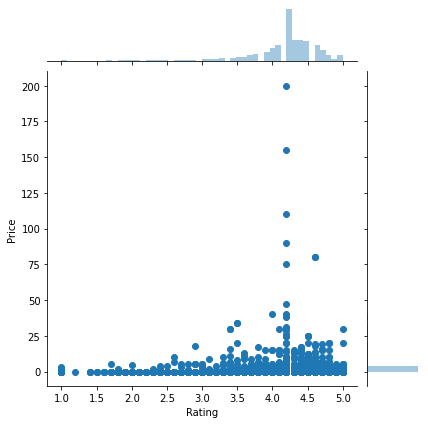

In [ ]:
# Creating a Joint Plot to compare 'Rating' with 'Price'
sns.jointplot(x='Rating',y='Price',data=gps)

# 'Rating' is increasing with 'Price' however not very significantly.

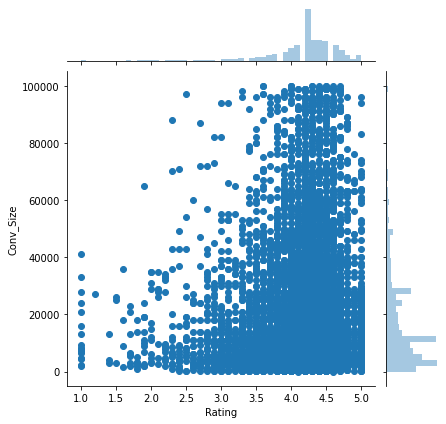

In [ ]:
# Creating a Joint Plot to compare 'Rating' with 'Conv_Size'
sns.jointplot(x='Rating',y='Conv_Size',data=gps)

# 'Rating' is increasing with 'Conv_Size' indicating that the heavier apps get higher ratings.

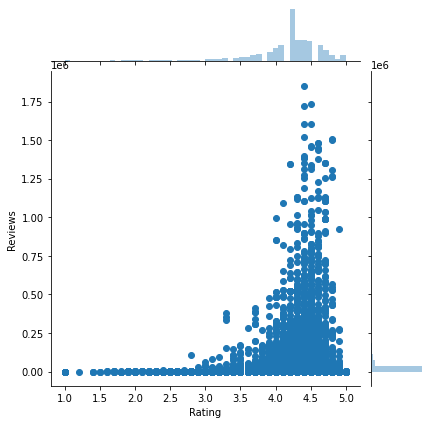

In [ ]:
# Creating a Joint Plot to compare 'Rating' with 'Reviews'
sns.jointplot(x='Rating',y='Reviews',data=gps)

# Higher the reviews, higher the rating.

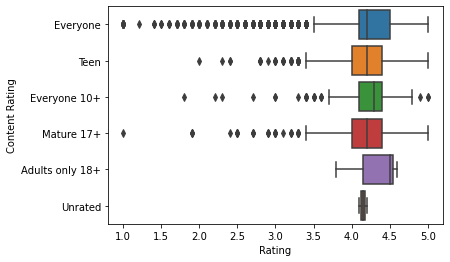

In [ ]:
# Creating a Boxplot to compare 'Rating' and 'Content Rating'
sns.boxplot(x='Rating', y='Content Rating', data=gps)

# Only the apps whose 'Content Rating' is 'Adults only 18+' have a bit higher rating.
# Other groups have similar ratings.

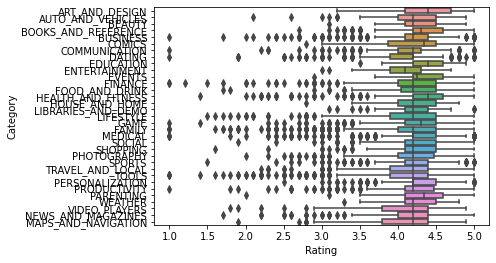

In [ ]:
# Creating a Boxplot to compare 'Rating' and 'Category'
sns.boxplot(x='Rating', y='Category', data=gps)

# "Arts & Design", "Education", "Heath & Fitness" and "Parenting" have the best rating.

# Data Preprocessing

In [ ]:
# Creating a copy of 'gps'
inp1 = gps.copy()

In [ ]:
# Checking the head of the new copied data frame 'inp1'
inp1.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Conv_Size
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0
5,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0.0,Everyone,Art & Design,5600.0


In [ ]:
# Applying Log Transformation to the column 'Reviews' and storing the output in a new column 'Reviews_Log'
inp1['Reviews_Log'] = np.log1p(inp1['Reviews'])

In [ ]:
# Applying Log Transformation to the column 'Installs' and storing the output in a new column 'Installs_Log'
inp1['Installs_Log'] = np.log1p(inp1['Installs'])

In [ ]:
# Rechecking the head of the new data frame 'inp1'
inp1.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Conv_Size,Reviews_Log,Installs_Log
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0,6.875232,13.122365
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0,11.379520,15.424949
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0,6.875232,11.512935
5,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0.0,Everyone,Art & Design,5600.0,5.123964,10.819798


In [ ]:
# Creating dummy variables for the columns 'Category', 'Type', 'Content Rating' and 'Genres'
# by dropping their first columns and storing the result in a new data frame 'inp2'

inp2 = pd.get_dummies(inp1, columns=['Category', 'Type', 'Content Rating', 'Genres'], drop_first=True)

In [ ]:
# Checking the head of the new data frame 'inp2'
inp2.head()

,Rating,Reviews,Installs,Price,Conv_Size,Reviews_Log,Installs_Log,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,...,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Education,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159.0,10000.0,0.0,19000.0,5.075174,9.210440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,500000.0,0.0,14000.0,6.875232,13.122365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,5000000.0,0.0,8700.0,11.379520,15.424949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,100000.0,0.0,2800.0,6.875232,11.512935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,50000.0,0.0,5600.0,5.123964,10.819798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Building Process

In [ ]:
# Defining the Independent Variables in a new data frame 'x'
x = inp2[['Price', 'Conv_Size', 'Reviews_Log', 'Installs_Log']]

In [ ]:
# Checking the head of 'x'
x.head()

,Price,Conv_Size,Reviews_Log,Installs_Log
0,0.0,19000.0,5.075174,9.210440
1,0.0,14000.0,6.875232,13.122365
2,0.0,8700.0,11.379520,15.424949
4,0.0,2800.0,6.875232,11.512935
5,0.0,5600.0,5.123964,10.819798


In [ ]:
# Checking the values of 'x'
x.values

array([[0.00000000e+00, 1.90000000e+04, 5.07517382e+00, 9.21044037e+00],
       [0.00000000e+00, 1.40000000e+04, 6.87523209e+00, 1.31223654e+01],
       [0.00000000e+00, 8.70000000e+03, 1.13795198e+01, 1.54249487e+01],
       ...,
       [0.00000000e+00, 9.50000000e+03, 1.38629436e+00, 6.90875478e+00],
       [0.00000000e+00, 1.10000000e+04, 4.74493213e+00, 6.90875478e+00],
       [0.00000000e+00, 1.90000000e+04, 1.28949809e+01, 1.61180958e+01]])

In [ ]:
# Defining the dependent variable in a new data frame 'y'
y = inp2['Rating']

In [ ]:
# Checking the head of 'y'
y.head()

0    4.1
1    3.9
2    4.7
4    4.3
5    4.4
Name: Rating, dtype: float64

In [ ]:
# Importing train_trest_split function from SciKit Learn Library
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the data into 70/30 ratio among training and testing data frames for dependent and independent variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=10)

In [ ]:
# Checking the shape of the training data frame for independent variables
x_train.shape

(6986, 4)

In [ ]:
# Checking the shape of the testing data frame for independent variables
x_test.shape

(2995, 4)

In [ ]:
# Checking the shape of the training data frame for dependent variables
y_train.shape

(6986,)

In [ ]:
# Checking the shape of the testing data frame for dependent variables
y_test.shape

(2995,)

In [ ]:
# Importing Linear Regression Function from SciKit Learn Library
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating an instance 'lm' for Linear Regression function
lm = LinearRegression()

In [ ]:
# Fitting the Linear Regression Function in the training data sets
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Finding the intercept
print(lm.intercept_)

4.514365474850641


In [ ]:
# Finding the co-efficients
lm.coef_

array([-2.81533752e-03,  2.15491810e-08,  1.26013193e-01, -1.11342105e-01])

In [ ]:
# Creating a new data frame 'coeff' for the coefficients
coeff = pd.DataFrame(data=lm.coef_, index=x_train.columns, columns=['Coefficients'])

In [ ]:
# Checking the data frame 'coeff'
coeff

,Coefficients
Price,-2.815338e-03
Conv_Size,2.154918e-08
Reviews_Log,1.260132e-01
Installs_Log,-1.113421e-01


In [ ]:
# Predicting results from the training data set of independent variables and assigning it to a variable 'pred_x'
pred_x = lm.predict(x_train)

In [ ]:
# Checking 'pred_x'
pred_x

array([4.12444856, 4.13072984, 4.10681926, ..., 4.23402587, 4.15158493,
       4.27199354])

In [ ]:
# Predicting results from the testing data set of independent variables and assigning it to a variable 'pred_y'
pred_y = lm.predict(x_test)

In [ ]:
# Checking 'pred_y'
pred_y

array([4.2320114 , 4.40429999, 4.2736529 , ..., 3.96837928, 4.01296427,
       4.03623678])

Text(0, 0.5, 'Predicted y')

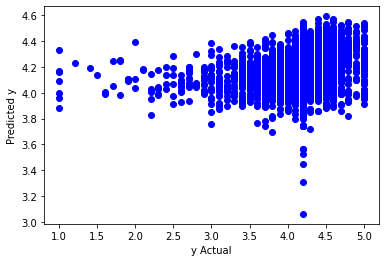

In [ ]:
# Plotting a Scatter Plot to compare dependent and independent variables for the testing data sets
plt.scatter(y_test, pred_y, color='blue', cmap='viridis')
plt.xlabel('y Actual')
plt.ylabel('Predicted y')

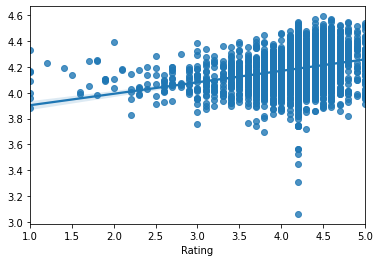

In [ ]:
# Using a Regression Plot to compare testing data sets for dependent and independent variables
sns.regplot(y_test, pred_y)

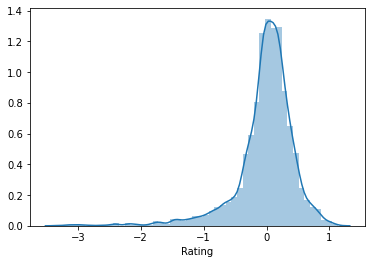

In [ ]:
# Using a Distribution Plot to compare testing data sets for dependent and independent variables
sns.distplot((y_test-pred_y))

# Model Evaluation Process

In [ ]:
# Importing Metrics Module from SciKit Learn Library
from sklearn import metrics

In [ ]:
# Importing R2 Score Function from Metrics Module
from sklearn.metrics import r2_score

In [ ]:
# Calculating Mean Absolute Error for training datasets
metrics.mean_absolute_error(y_train, pred_x)

0.31914297939715325

In [ ]:
# Calculating Mean Absolute Error for the testing datasets
metrics.mean_absolute_error(y_test, pred_y)

0.31171038293166237

In [ ]:
# Caluclating Mean Squared Error for the training datasets
metrics.mean_squared_error(y_train, pred_x)

0.21876266925719118

In [ ]:
# Caluclating Mean Squared Error for the testing datasets
metrics.mean_squared_error(y_test, pred_y)

0.22561994378902442

In [ ]:
# Calculating Root Mean Squared Error for training datasets
np.sqrt(metrics.mean_squared_error(y_train, pred_x))

0.4677207171562867

In [ ]:
# Calculating Root Mean Squared Error for testing datasets
np.sqrt(metrics.mean_squared_error(y_test, pred_y))

0.47499467764283887

In [ ]:
# Calculating R2 Score for dependent training variable
r2_score(y_train, pred_x)

0.08953874197695721

In [ ]:
# Calculating R2 Score for dependent testing variable
r2_score(y_test, pred_y)

0.0877755017688916

# Second Model Building Process

In [ ]:
# Defining Independent Variables from 'inp2'

x1 = inp2.iloc[:,1:163]

In [ ]:
# Checking the shape of 'x1'
x1.shape

(9981, 162)

In [ ]:
# Defining Dependent Variable from 'inp2'
y1 = inp2['Rating']

In [ ]:
# Checking the shape of 'y1'
y1.shape

(9981,)

In [ ]:
# Spliting the data into 70/30 ratio among training and testing data frames for dependent and independent variables
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=10)

In [ ]:
# Fitting the Linear Regression Function in the training data sets
lm.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Checking the intercept
print(lm.intercept_)

4.611046968050787


In [ ]:
# Finding the coefficients
lm.coef_

array([ 2.55374092e-08,  1.02785081e-08, -3.11595929e-03, -8.13225584e-08,
        1.25909260e-01, -1.15719196e-01,  1.37800218e-01,  1.94561021e-01,
        1.73699276e-01,  1.05907576e-01,  3.64129401e-01,  6.72725972e-02,
        4.36004642e-02,  3.90467915e-02, -5.40155908e-02,  1.97963145e-01,
        1.70894152e-02,  8.60804649e-02,  1.00162768e-01,  1.75290433e-01,
        1.31972496e-01,  1.23813187e-01,  1.52644266e-01,  7.43419728e-02,
        3.82610406e-02,  1.29497832e-01,  8.08460915e-02,  3.06484062e-01,
        1.52854147e-01,  7.81659005e-02,  1.07163020e-01,  1.21175404e-01,
        1.11170091e-01,  1.10270079e-01,  1.36384041e-01,  1.35102320e-01,
        1.70725058e-02,  1.11105284e-01, -1.52078979e-02, -2.65152848e-01,
       -2.79758030e-01, -3.00020449e-01, -2.75694018e-01,  6.67004558e-02,
        1.44969624e-01, -4.58587932e-02,  1.53879328e-01,  4.75846630e-01,
       -8.35187250e-02,  3.05577728e-02,  2.16536447e-01,  4.64089560e-01,
        4.30369518e-01,  

In [ ]:
# Creating a new data frame 'coeff1' for the coefficients
coeff1 = pd.DataFrame(data=lm.coef_, index=x1.columns, columns=['Coefficients1'])

In [ ]:
# Checking the data frame 'coeff1'
coeff1

,Coefficients1
Reviews,2.553741e-08
Installs,1.027851e-08
Price,-3.115959e-03
Conv_Size,-8.132256e-08
Reviews_Log,1.259093e-01
...,...
Genres_Video Players & Editors,4.604033e-02
Genres_Video Players & Editors;Creativity,-4.007437e-02
Genres_Video Players & Editors;Music & Video,-5.843415e-02
Genres_Weather,1.111053e-01


In [ ]:
# Predicting results from the training data set of independent variables and assigning it to a variable 'pred_x1'
pred_x1 = lm.predict(x1_train)

In [ ]:
# Checking 'pred_x1'
pred_x1

array([4.09003825, 4.12239765, 4.14253753, ..., 4.27446856, 4.11349209,
       4.31077322])

In [ ]:
# Predicting results from the testing data set of independent variables and assigning it to a variable 'pred_y1'
pred_y1 = lm.predict(x1_test)

In [ ]:
# Checking 'pred_y1'
pred_y1

array([4.09138523, 4.3461557 , 4.25029202, ..., 3.84480487, 3.88020762,
       4.03889823])

# Second Model Evaluation Process

In [ ]:
# Calculating Mean Absolute Error for training datasets
metrics.mean_absolute_error(y1_train, pred_x1)

0.3112188225639671

In [ ]:
# Calculating Mean Absolute Error for testing datasets
metrics.mean_absolute_error(y1_test, pred_y1)

0.3104063428655536

In [ ]:
# Caluclating Mean Squared Error for the training datasets
metrics.mean_squared_error(y1_train, pred_x1)

0.2086814037843757

In [ ]:
# Caluclating Mean Squared Error for the testing datasets
metrics.mean_squared_error(y1_test, pred_y1)

0.22007333601289708

In [ ]:
# Calculating Root Mean Squared Error for training datasets
np.sqrt(metrics.mean_squared_error(y1_train, pred_x1))

0.4568165975360086

In [ ]:
# Calculating Root Mean Squared Error for testing datasets
np.sqrt(metrics.mean_squared_error(y1_test, pred_y1))

0.46911974592090777

In [ ]:
# Calculating R2 for dependent training variable
r2_score(y1_train, pred_x1)

0.13149563378125717

In [ ]:
# Calculating R2 for dependent testing variable
r2_score(y1_test, pred_y1)

0.11020149572354787

# Second Data Preprocessing

In [ ]:
# Creating a copy of 'inp1'
inp3 = inp1.copy()

In [ ]:
# Checking the head of the new data frame
inp3.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Conv_Size,Reviews_Log,Installs_Log
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0,6.875232,13.122365
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0,11.379520,15.424949
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0,6.875232,11.512935
5,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0.0,Everyone,Art & Design,5600.0,5.123964,10.819798


In [ ]:
# Finding the unique values in column 'Category'
inp3.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# Creating a user-defined function to create groups for column 'Category'

def cate_group(inp3):
  result = []
  for x in inp3['Category']:
    if x == 'ART_AND_DESIGN':
      tmp = int(1)
      result.append(tmp)
    elif x == 'AUTO_AND_VEHICLES':
      tmp = int(2)
      result.append(tmp)
    elif x == 'BEAUTY':
      tmp = int(3)
      result.append(tmp)
    elif x == 'BOOKS_AND_REFERENCE':
      tmp = int(4)
      result.append(tmp)
    elif x == 'BUSINESS':
      tmp = int(5)
      result.append(tmp)
    elif x == 'COMICS':
      tmp = int(6)
      result.append(tmp)
    elif x == 'COMMUNICATION':
      tmp = int(7)
      result.append(tmp)
    elif x == 'DATING':
      tmp = int(8)
      result.append(tmp)
    elif x == 'EDUCATION':
      tmp = int(9)
      result.append(tmp)
    elif x == 'ENTERTAINMENT':
      tmp = int(10)
      result.append(tmp)
    elif x == 'EVENTS':
      tmp = int(11)
      result.append(tmp)
    elif x == 'FAMILY':
      tmp = int(12)
      result.append(tmp)
    elif x == 'FINANCE':
      tmp = int(13)
      result.append(tmp)
    elif x == 'FOOD_AND_DRINK':
      tmp = int(14)
      result.append(tmp)
    elif x == 'GAME':
      tmp = int(15)
      result.append(tmp)
    elif x == 'HEALTH_AND_FITNESS':
      tmp = int(16)
      result.append(tmp)
    elif x == 'HOUSE_AND_HOME':
      tmp = int(17)
      result.append(tmp)
    elif x == 'LIBRARIES_AND_DEMO':
      tmp = int(18)
      result.append(tmp)
    elif x == 'LIFESTYLE':
      tmp = int(19)
      result.append(tmp)
    elif x == 'MAPS_AND_NAVIGATION':
      tmp = int(20)
      result.append(tmp)
    elif x == 'MEDICAL':
      tmp = int(21)
      result.append(tmp)
    elif x == 'NEWS_AND_MAGAZINES':
      tmp = int(22)
      result.append(tmp)
    elif x == 'PARENTING':
      tmp = int(23)
      result.append(tmp)
    elif x == 'PERSONALIZATION':
      tmp = int(24)
      result.append(tmp)
    elif x == 'PHOTOGRAPHY':
      tmp = int(25)
      result.append(tmp)
    elif x == 'PRODUCTIVITY':
      tmp = int(26)
      result.append(tmp)
    elif x == 'SHOPPING':
      tmp = int(27)
      result.append(tmp)
    elif x == 'SOCIAL':
      tmp = int(28)
      result.append(tmp)
    elif x == 'SPORTS':
      tmp = int(29)
      result.append(tmp)
    elif x == 'TOOLS':
      tmp = int(30)
      result.append(tmp)
    elif x == 'TRAVEL_AND_LOCAL':
      tmp = int(31)
      result.append(tmp)
    elif x == 'VIDEO_PLAYERS':
      tmp = int(32)
      result.append(tmp)
    elif x == 'WEATHER':
      tmp = int(33)
      result.append(tmp)
  return result

In [ ]:
# Calling the user-defined function
result = cate_group(inp3)

In [ ]:
# Adding a new column 'Category_Group' to the data frame
inp3['Category_Group'] = result

In [ ]:
# Checking the unique values present in the column 'Category_Group'
inp3.Category_Group.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17, 18, 19,
       15, 12, 21, 28, 27, 25, 29, 31, 30, 24, 26, 23, 33, 32, 22, 20])

In [ ]:
# Checking the mean of each category created in column 'Category_Group'
# based on the values in the column 'Rating' and storing it in a variable

Cate_Mean = inp3.groupby('Category_Group').Rating.mean()

In [ ]:
# Calling 'Cate_Mean' in descending order.
Cate_Mean.sort_values(ascending=False)

# Category 'Education' has the highest rating and 'Dating' has the lowest rating.

Category_Group
9     4.379605
11    4.365625
1     4.348437
4     4.310268
24    4.296486
23    4.283333
3     4.262264
16    4.260479
28    4.243200
15    4.241881
33    4.228571
27    4.226522
29    4.215676
17    4.197727
21    4.191793
2     4.191765
12    4.186236
18    4.183529
26    4.179609
14    4.171654
6     4.156667
5     4.147778
22    4.142647
25    4.142105
13    4.141076
7     4.123510
19    4.119786
10    4.107519
31    4.099156
20    4.051908
30    4.045211
32    4.037333
8     4.008974
Name: Rating, dtype: float64

In [ ]:
# Creating a duplicate column for 'Content Rating'
inp3['Content_Rating'] = inp3['Content Rating'].copy()

In [ ]:
# Checking the head of 'inp3'
inp3.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Conv_Size,Reviews_Log,Installs_Log,Category_Group,Content_Rating
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,19000.0,5.075174,9.210440,1,Everyone
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0,6.875232,13.122365,1,Everyone
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,8700.0,11.379520,15.424949,1,Everyone
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0,6.875232,11.512935,1,Everyone
5,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0.0,Everyone,Art & Design,5600.0,5.123964,10.819798,1,Everyone


In [ ]:
# Dropping the column 'Content Rating' as it is copied
inp3.drop(['Content Rating'], axis=1, inplace=True)

In [ ]:
# Finding the unique values of column 'Content_Rating'
inp3.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
# Creating a user-defined function to create groups in column 'Content_Rating'

def cr_group(inp3):
  result = []
  for x in inp3['Content_Rating']:
    if x == 'Adults only 18+':
      tmp = int(1)
      result.append(tmp)
    elif x == 'Everyone':
      tmp = int(2)
      result.append(tmp)
    elif x == 'Everyone 10+':
      tmp = int(3)
      result.append(tmp)
    elif x == 'Mature 17+':
      tmp = int(4)
      result.append(tmp)
    elif x == 'Teen':
      tmp = int(5)
      result.append(tmp)
    elif x == 'Unrated':
      tmp = int(6)
      result.append(tmp)
  return result

In [ ]:
# Calling the user-defined function
result = cr_group(inp3)

In [ ]:
# Adding a new column 'CR_Group' to the data frame
inp3['CR_Group'] = result

In [ ]:
# Checking the number of unique values present in the column 'CR_Group'
inp3.CR_Group.unique()

array([2, 5, 3, 4, 1, 6])

In [ ]:
# Checking the mean of each category created in column 'CR_Group'
# based on the values in the column 'Rating' and storing it in a variable

CR_Mean = inp3.groupby('CR_Group').Rating.mean()

In [ ]:
# Calling 'CR_Mean' in descending order.
CR_Mean.sort_values(ascending=False)

# Category 'Adults only 18+' has the highest rating and 'Mature 17+' has the lowest rating.

CR_Group
1    4.300000
3    4.218571
5    4.204680
2    4.176370
6    4.150000
4    4.110480
Name: Rating, dtype: float64

In [ ]:
# Creating a dummy variable for the column 'Type'
inp3 = pd.get_dummies(inp3, columns=['Type'], drop_first=True)

In [ ]:
# Checking the head of 'inp3'
inp3.head()

,Category,Rating,Reviews,Installs,Price,Genres,Conv_Size,Reviews_Log,Installs_Log,Category_Group,Content_Rating,CR_Group,Type_Paid
0,ART_AND_DESIGN,4.1,159.0,10000.0,0.0,Art & Design,19000.0,5.075174,9.210440,1,Everyone,2,0
1,ART_AND_DESIGN,3.9,967.0,500000.0,0.0,Art & Design;Pretend Play,14000.0,6.875232,13.122365,1,Everyone,2,0
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,0.0,Art & Design,8700.0,11.379520,15.424949,1,Everyone,2,0
4,ART_AND_DESIGN,4.3,967.0,100000.0,0.0,Art & Design;Creativity,2800.0,6.875232,11.512935,1,Everyone,2,0
5,ART_AND_DESIGN,4.4,167.0,50000.0,0.0,Art & Design,5600.0,5.123964,10.819798,1,Everyone,2,0


# Third Model Building Process

In [ ]:
# Defining the independent variables in a new data frame 'x2'
x2 = inp3[['Reviews', 'Installs', 'Price', 'Conv_Size', 'Category_Group', 'CR_Group', 'Reviews_Log', 'Installs_Log', 'Type_Paid']]

In [ ]:
# Defining the dependent variable in a new data frame 'y2'
y2 = inp3['Rating']

In [ ]:
# Splitting the data into 70/30 ratio among training and testing data frames from dependent and independent variables
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state=10)

In [ ]:
# Fitting the Linear Regression Function in the training data sets
lm.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Finding the intercept
print(lm.intercept_)

4.633806277474827


In [ ]:
# Finding the coefficients
lm.coef_

array([ 4.14518173e-08,  9.99386675e-09, -2.75839839e-03, -8.70697880e-08,
       -2.66640230e-03, -2.15011372e-02,  1.20957932e-01, -1.11752505e-01,
        6.96115414e-04])

In [ ]:
# Creating a new data frame 'coeff2' for the coefficients
coeff2 = pd.DataFrame(data=lm.coef_, index=x2_train.columns, columns=['Coefficents2'])

In [ ]:
# Checking the data frame 'coeff2'
coeff2

,Coefficents2
Reviews,4.145182e-08
Installs,9.993867e-09
Price,-2.758398e-03
Conv_Size,-8.706979e-08
Category_Group,-2.666402e-03
CR_Group,-2.150114e-02
Reviews_Log,1.209579e-01
Installs_Log,-1.117525e-01
Type_Paid,6.961154e-04


In [ ]:
# Predicting results from the training data set of independent variables and assigning it to a variable 'pred_x2'
pred_x2 = lm.predict(x2_train)

In [ ]:
# Checking 'pred_x2'
pred_x2

array([4.13994832, 4.09325847, 4.10158769, ..., 4.21837558, 4.16202391,
       4.25284185])

In [ ]:
# Predicting the results from the testing data set of independent variables and assigning it to a variable 'pred_y2'
pred_y2 = lm.predict(x2_test)

In [ ]:
# Checking 'pred_y2'
pred_y2

array([4.23711367, 4.49784192, 4.23771324, ..., 3.9966333 , 4.01119931,
       4.07368552])

# Third Model Evaluation Process

In [ ]:
# Calculating Mean Absolute Error for training datasets
metrics.mean_absolute_error(y2_train, pred_x2)

0.3184038468828998

In [ ]:
# Calculating Mean Absolute Error for the testing datasets
metrics.mean_absolute_error(y2_test, pred_y2)

0.31251276520275045

In [ ]:
# Calculating Mean Squared Error for the training datasets
metrics.mean_squared_error(y2_train, pred_x2)

0.21721839849877056

In [ ]:
# Calculating Mean Squared Error for the testing datasets
metrics.mean_squared_error(y2_test, pred_y2)

0.22490380192113058

In [ ]:
# Calculating Root Mean Squared Error for the training datasets
np.sqrt(metrics.mean_squared_error(y2_train, pred_x2))

0.4660669463701224

In [ ]:
# Calculating Root Mean Squared Error for the testing datasets
np.sqrt(metrics.mean_squared_error(y2_test, pred_y2))

0.47424023650585634

In [ ]:
# Calculating R2 Score for depedent training variable
r2_score(y2_train, pred_x2)

0.09596579236089098

In [ ]:
# Calculating R2 Score for dependent testing variable
r2_score(y2_test, pred_y2)

0.09067100003527107